In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('old_faithful.csv', sep='\t', header=0)

In [2]:
eruptions = []
waiting =[]
biv = []
for i in range(0,len(df)):
    eruptions.append(df["eruptions"][i])
    waiting.append(df["waiting"][i])
    biv.append([df["eruptions"][i],df["waiting"][i]])
        

In [3]:
eruptions = np.array(eruptions)
waiting =np.array(waiting)
biv =np.array(biv)
biv_mean = 0
biv_cov = 0

for i in range(0,len(biv)):
    biv_mean+=biv[i]
biv_mean=biv_mean/len(biv)    

for i in range(0,len(biv)):
    biv_cov+= np.dot(np.transpose(np.matrix((biv[i]-biv_mean))),(np.matrix((biv[i]-biv_mean))))
biv_cov=biv_cov/len(biv)

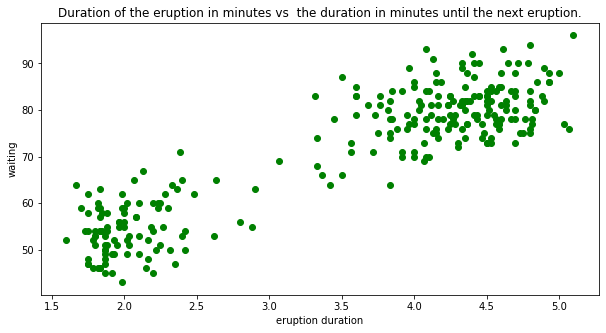

In [4]:
plt.figure(figsize=(10,5))
plt.plot(eruptions,waiting,'go')
plt.title("Duration of the eruption in minutes vs  the duration in minutes until the next eruption.")
plt.ylabel("waiting")
plt.xlabel("eruption duration")

plt.show()

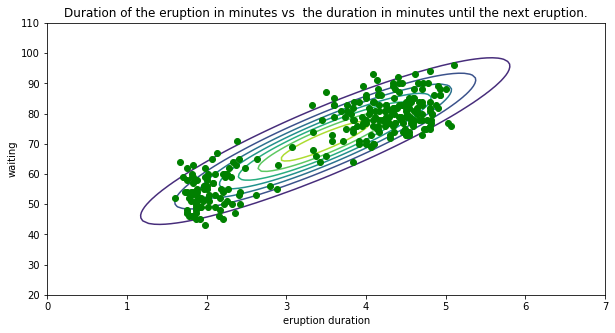

In [5]:

t = np.linspace(0, 7, 100)
h = np.linspace(20, 110, 100)
w_0, w_1 = np.meshgrid(t, h)
z = stats.multivariate_normal(biv_mean,biv_cov).pdf(np.dstack((w_0, w_1)))
plt.figure(figsize=(10,5))
plt.plot(eruptions,waiting,'go')
plt.title("Duration of the eruption in minutes vs  the duration in minutes until the next eruption.")
plt.ylabel("waiting")
plt.xlabel("eruption duration")
plt.contour(t, h, z)
plt.show()
